<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Correlation**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis (EDA). You will examine the distribution of the data, identify outliers, and determine the correlation between different columns in the dataset.


## Objectives


In this lab, you will perform the following:


- Identify the distribution of compensation data in the dataset.

- Remove outliers to refine the dataset.

- Identify correlations between various features in the dataset.


## Hands on Lab


##### Step 1: Install and Import Required Libraries


In [1]:
# Install the necessary libraries
!pip install pandas
!pip install matplotlib
!pip install seaborn

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Step 2: Load the Dataset


In [2]:
# Load the dataset from the given URL
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(file_url)

# Display the first few rows to understand the structure of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 3: Analyze and Visualize Compensation Distribution</h3>


**Task**: Plot the distribution and histogram for `ConvertedCompYearly` to examine the spread of yearly compensation among respondents.


Compensation Statistics:
count    2.343500e+04
mean     8.615529e+04
std      1.867570e+05
min      1.000000e+00
25%      3.271200e+04
50%      6.500000e+04
75%      1.079715e+05
max      1.625660e+07
Name: ConvertedCompYearly, dtype: float64


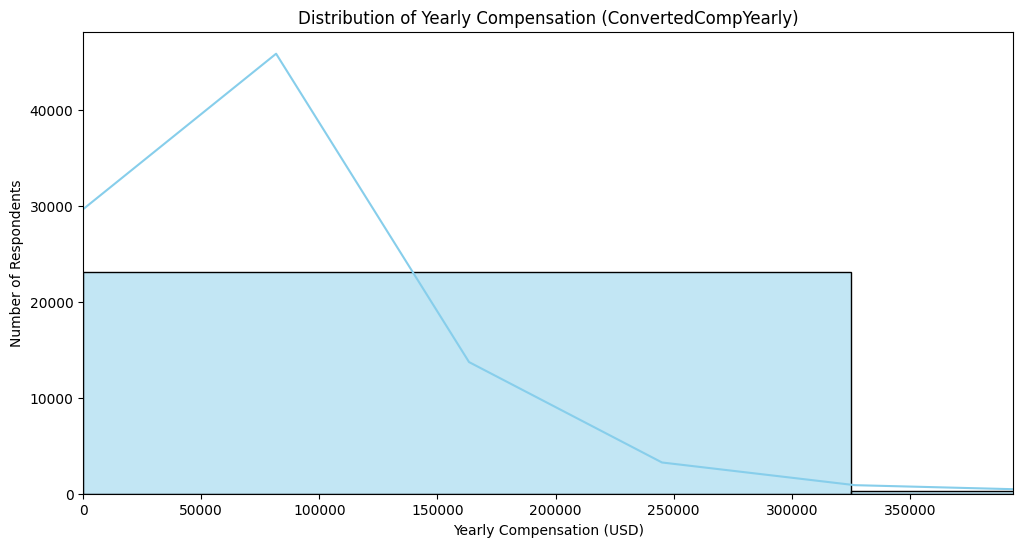

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Drop missing values in ConvertedCompYearly to avoid errors in visualization
df_comp = df['ConvertedCompYearly'].dropna()

# Basic statistics
print("Compensation Statistics:")
print(df_comp.describe())

# Plot histogram
plt.figure(figsize=(12,6))
sns.histplot(df_comp, bins=50, kde=True, color='skyblue')
plt.title("Distribution of Yearly Compensation (ConvertedCompYearly)")
plt.xlabel("Yearly Compensation (USD)")
plt.ylabel("Number of Respondents")
plt.xlim(0, df_comp.quantile(0.99))  # limit x-axis to 99th percentile for better visualization
plt.show()


<h3>Step 4: Calculate Median Compensation for Full-Time Employees</h3>


**Task**: Filter the data to calculate the median compensation for respondents whose employment status is "Employed, full-time."


In [4]:
# Filter full-time employees
full_time_df = df[df['Employment'] == 'Employed, full-time']

# Drop missing values in ConvertedCompYearly
full_time_comp = full_time_df['ConvertedCompYearly'].dropna()

# Calculate median compensation
median_full_time = full_time_comp.median()
print(f"Median yearly compensation for full-time employees: ${median_full_time:,.2f}")


Median yearly compensation for full-time employees: $69,814.00


<h3>Step 5: Analyzing Compensation Range and Distribution by Country</h3>


Explore the range of compensation in the ConvertedCompYearly column by analyzing differences across countries. Use box plots to compare the compensation distributions for each country to identify variations and anomalies within each region, providing insights into global compensation trends.



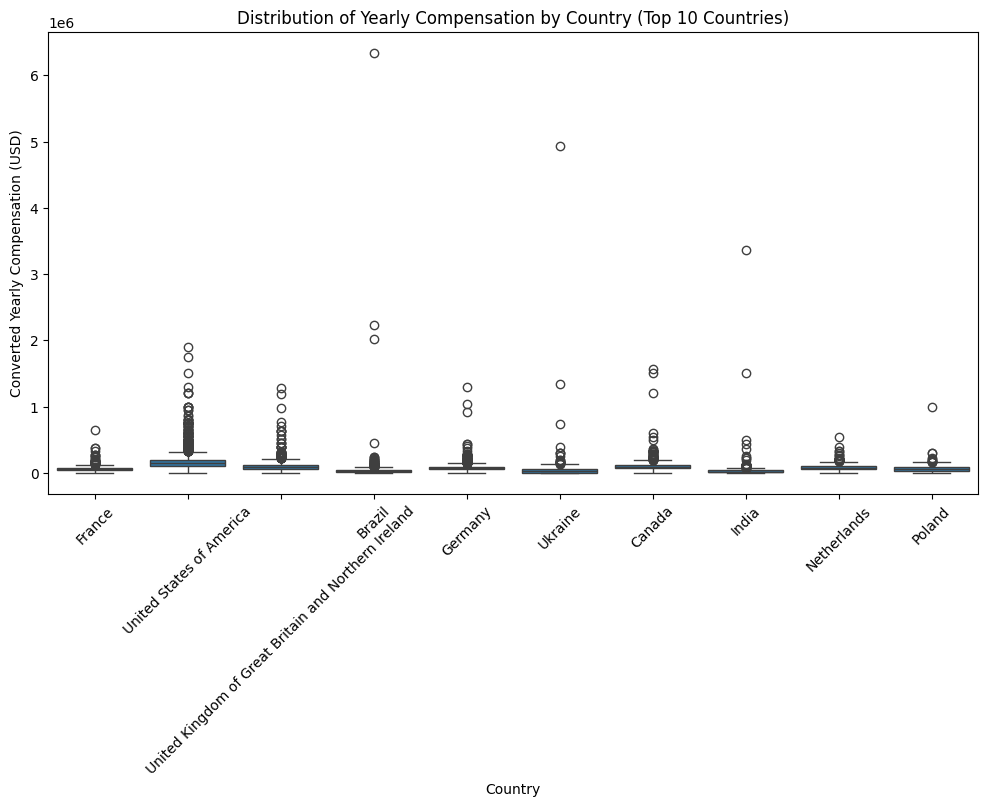

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Drop rows with missing compensation or country
comp_country_df = df.dropna(subset=['ConvertedCompYearly', 'Country'])

# Optional: Filter for top countries by number of respondents to make the plot readable
top_countries = comp_country_df['Country'].value_counts().nlargest(10).index
comp_country_df = comp_country_df[comp_country_df['Country'].isin(top_countries)]

# Create a boxplot of compensation by country
plt.figure(figsize=(12,6))
sns.boxplot(x='Country', y='ConvertedCompYearly', data=comp_country_df)
plt.xticks(rotation=45)
plt.title("Distribution of Yearly Compensation by Country (Top 10 Countries)")
plt.ylabel("Converted Yearly Compensation (USD)")
plt.xlabel("Country")
plt.show()


<h3>Step 6: Removing Outliers from the Dataset</h3>


**Task**: Create a new DataFrame by removing outliers from the `ConvertedCompYearly` column to get a refined dataset for correlation analysis.


In [6]:
# Drop rows with missing compensation
comp_df = df.dropna(subset=['ConvertedCompYearly'])

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = comp_df['ConvertedCompYearly'].quantile(0.25)
Q3 = comp_df['ConvertedCompYearly'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter data to remove outliers
df_no_outliers = comp_df[(comp_df['ConvertedCompYearly'] >= lower_bound) & 
                          (comp_df['ConvertedCompYearly'] <= upper_bound)]

# Check the size difference
print(f"Original dataset rows: {comp_df.shape[0]}")
print(f"Dataset after removing outliers: {df_no_outliers.shape[0]}")


Original dataset rows: 23435
Dataset after removing outliers: 22457


<h3>Step 7: Finding Correlations Between Key Variables</h3>


**Task**: Calculate correlations between `ConvertedCompYearly`, `WorkExp`, and `JobSatPoints_1`. Visualize these correlations with a heatmap.


                      ConvertedCompYearly  YearsCodePro_numeric  \
ConvertedCompYearly              1.000000              0.401078   
YearsCodePro_numeric             0.401078              1.000000   
JobSatPoints_1                  -0.045748             -0.030394   

                      JobSatPoints_1  
ConvertedCompYearly        -0.045748  
YearsCodePro_numeric       -0.030394  
JobSatPoints_1              1.000000  


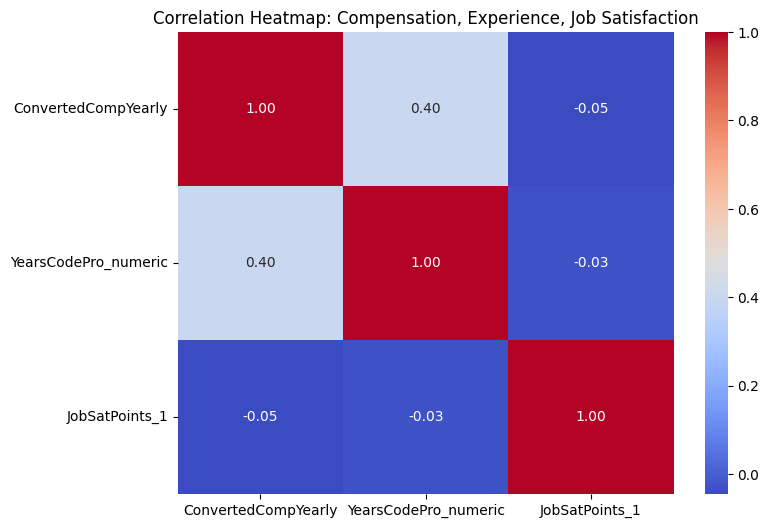

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert YearsCodePro to numeric
def convert_years(x):
    if pd.isnull(x):
        return np.nan
    if x == "Less than 1 year":
        return 0.5
    if x == "More than 50 years":
        return 51
    try:
        return float(x)
    except:
        return np.nan

df['YearsCodePro_numeric'] = df['YearsCodePro'].apply(convert_years)

# Assuming you already removed outliers from ConvertedCompYearly
df_no_outliers = df[df['ConvertedCompYearly'] <= df['ConvertedCompYearly'].quantile(0.99)]

# Select relevant columns and drop rows with missing values
corr_df = df_no_outliers[['ConvertedCompYearly', 'YearsCodePro_numeric', 'JobSatPoints_1']].dropna()

# Calculate correlation matrix
corr_matrix = corr_df.corr()

# Display the correlation matrix
print(corr_matrix)

# Visualize correlations using a heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap: Compensation, Experience, Job Satisfaction")
plt.show()


<h3>Step 8: Scatter Plot for Correlations</h3>


**Task**: Create scatter plots to examine specific correlations between `ConvertedCompYearly` and `WorkExp`, as well as between `ConvertedCompYearly` and `JobSatPoints_1`.


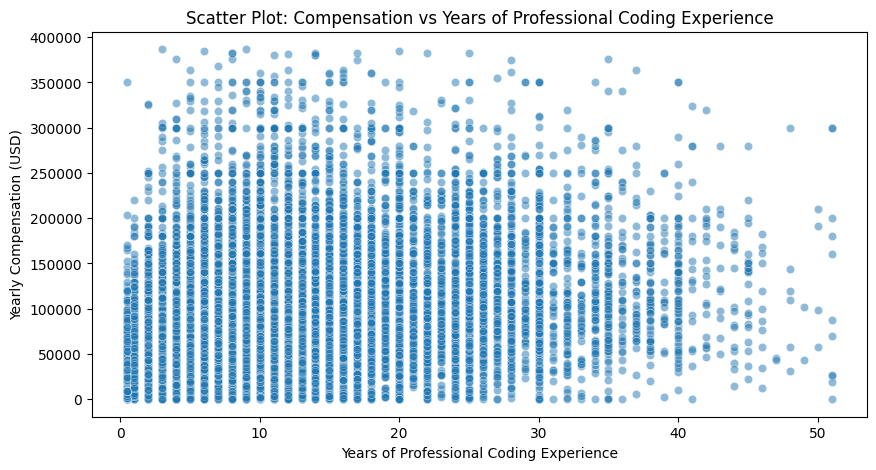

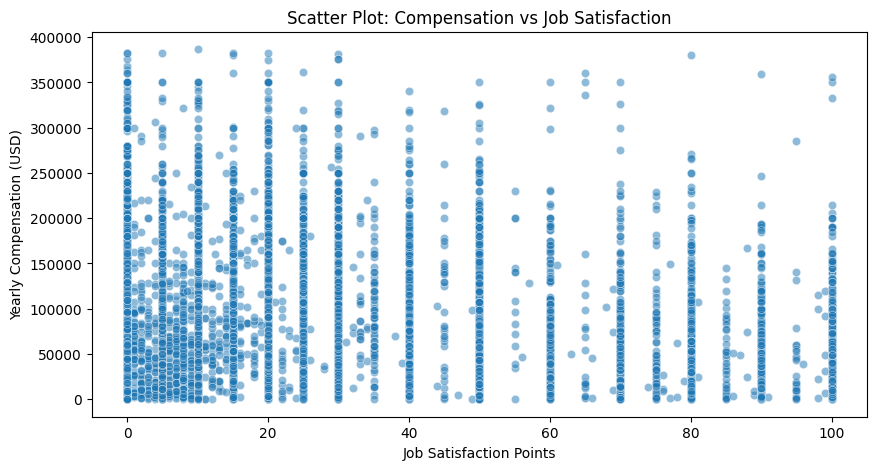

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot: ConvertedCompYearly vs YearsCodePro_numeric (Work Experience)
plt.figure(figsize=(10,5))
sns.scatterplot(
    x='YearsCodePro_numeric', 
    y='ConvertedCompYearly', 
    data=df_no_outliers,
    alpha=0.5
)
plt.title("Scatter Plot: Compensation vs Years of Professional Coding Experience")
plt.xlabel("Years of Professional Coding Experience")
plt.ylabel("Yearly Compensation (USD)")
plt.show()

# Scatter plot: ConvertedCompYearly vs JobSatPoints_1 (Job Satisfaction)
plt.figure(figsize=(10,5))
sns.scatterplot(
    x='JobSatPoints_1', 
    y='ConvertedCompYearly', 
    data=df_no_outliers,
    alpha=0.5
)
plt.title("Scatter Plot: Compensation vs Job Satisfaction")
plt.xlabel("Job Satisfaction Points")
plt.ylabel("Yearly Compensation (USD)")
plt.show()


<h3>Summary</h3>


In this lab, you practiced essential skills in correlation analysis by:

- Examining the distribution of yearly compensation with histograms and box plots.
- Detecting and removing outliers from compensation data.
- Calculating correlations between key variables such as compensation, work experience, and job satisfaction.
- Visualizing relationships with scatter plots and heatmaps to gain insights into the associations between these features.

By following these steps, you have developed a solid foundation for analyzing relationships within the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
